In [1]:
import os
import random
import requests
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# エンドポイントの指定
endpoint_url = ""

In [2]:
dataset_raw = pd.read_csv('ad_data/Ads_CTR_Optimisation.csv')
dataset = dataset_raw.iloc[:, :8]
dataset_raw

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


In [3]:
N = 1000
max_random_list = []
max_random_mean = 0  
max_random_mean_list = []
dataset = dataset_raw.iloc[:, :]

d = len(dataset.columns)
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
numbers_of_rewards = np.array([numbers_of_rewards_1, numbers_of_rewards_0])

total_reward = 0

for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards[1][i] + 1, numbers_of_rewards[0][i] + 1)
        
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    max_random_list.append(max_random)
    max_random_mean += max_random
    max_random_mean /= 2
    max_random_mean_list.append(max_random_mean)
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if reward == 1:
        numbers_of_rewards[1][ad] = numbers_of_rewards[1][ad] + 1
    else:
        numbers_of_rewards[0][ad] = numbers_of_rewards[0][ad] + 1

In [4]:
numbers_of_rewards

array([[ 35,  21,  28, 161, 311,  26,  28, 142,  38,  30],
       [  2,   0,   1,  32, 107,   1,   1,  31,   4,   1]])

In [5]:
hit_list = numbers_of_rewards[1].tolist()
miss_list = numbers_of_rewards[0].tolist()
y = max_random

In [6]:

    
data = {
    "hit_list":hit_list,
    "miss_list":miss_list,
    "number_of_repeat":3,
    "y":y
}
url = endpoint_url + "//grover_arm"
r = requests.post(url, json=data)

<BarContainer object of 8 artists>

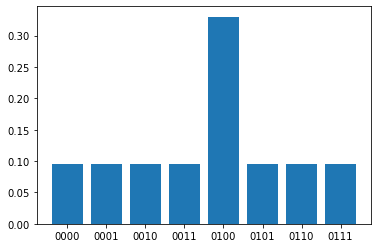

In [7]:
results_count = r.json()
plt.bar(results_count.keys(), results_count.values())